In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as col
import sys
sys.path.append('/pool/firebolt1/p484/projects/huang/rings')
from continuumanalysis3 import Continuum
from fitellipse import *

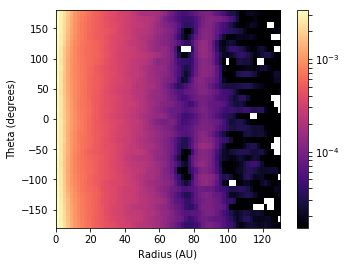

(1e-05, 0.0042874969421130447)

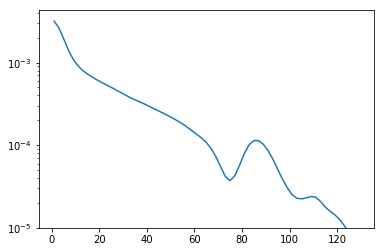

In [11]:
disk = {'filename': '/data/sandrews/jhfiles/LPfiles/taperedimages/GWLup_tapered.image.fits',
                          'distance':155,
                          'incl' : 39.9,
                          'PA' : 36.9,
                          'offsetx' : 1.09*.003,
                          'offsety' : -0.55*.003,
                          'size': 1.5,
                          'gamma': 0.6
                         }

#make some preliminary plots
cont = Continuum(disk['filename'], disk['offsetx'],disk['offsety'], disk['PA'], disk['incl'], disk['distance'])
    
radialbins = 1+2*np.arange(65)
surfbrightness, SB_scatter, rtmap = cont.azunwrap(radialbins, tbins = -175 + 10.*np.arange(36))

#plt.imshow(rtmap,extent =[0, np.max(radialbins)+1, -180,180], 
#           aspect = 0.35, origin = 'lower', cmap = 'magma', vmin = 0, norm = col.PowerNorm(gamma = 0.4))
plt.imshow(rtmap,extent =[0, np.max(radialbins)+1, -180,180], 
           aspect = 0.35, origin = 'lower', cmap = 'magma', norm = col.LogNorm(vmin = 1.5e-5))
plt.ylim(ymin = -180, ymax = 180)
plt.xlim(xmin=0, xmax=130)
plt.xlim(xmin=0, xmax=130)
plt.colorbar()
plt.xlabel('Radius (AU)')
plt.ylabel('Theta (degrees)')
plt.show()

plt.semilogy(radialbins, surfbrightness)
plt.ylim(ymin = 1.e-5)

/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


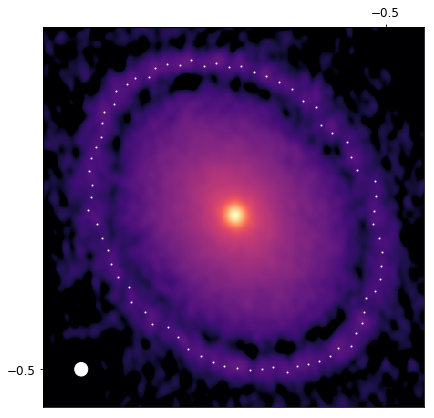

/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):


The MLE offsets are delta_x = -2.265e-03 arcsec, delta_y = 1.158e-03 arcsec
The MLE semi-major axis is r = 0.552 arcsec
The MLE inclination is i = 38.966 degrees
The MLE position angle is PA = 37.305 degrees
The MLE log-variance in the pixel offsets from the true ellipse is -9.241e+00


In [22]:
# Extract the ring that's at ~85 AU
xcoords1, ycoords1 = cont.extract_ring(80,100,tbins = -177.5+5*np.arange(72), extract_type = 'max')

cont.plot_extracted_ring(cont,xcoords1, ycoords1, 0.4, 1.25)

#get maximum likelihood estimates and check that ellipse parameters seem reasonable
mle_1 = ellipse_mle([disk["offsetx"],
                     disk["offsety"],
                     0.7,
                     np.cos(disk["incl"]*np.pi/180.),
                     disk["PA"]*np.pi/180., 
                     np.log(.01**2)], 
                    xcoords1, ycoords1)

/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


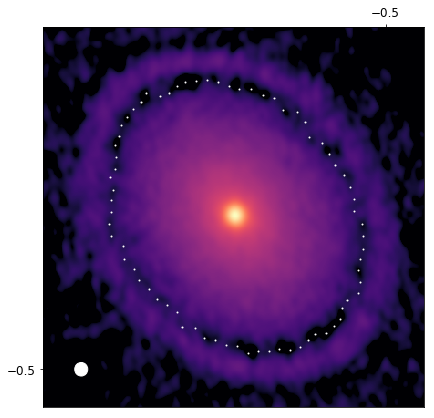

/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):


The MLE offsets are delta_x = -2.556e-03 arcsec, delta_y = 7.800e-04 arcsec
The MLE semi-major axis is r = 0.480 arcsec
The MLE inclination is i = 38.963 degrees
The MLE position angle is PA = 37.522 degrees
The MLE log-variance in the pixel offsets from the true ellipse is -9.490e+00


In [24]:
# Extract the gap that's at ~75 AU
xcoords2, ycoords2 = cont.extract_ring(70,80,tbins = -177.5+5*np.arange(72), extract_type = 'min')

cont.plot_extracted_ring(cont,xcoords2, ycoords2, 0.4, 1.25)

#get maximum likelihood estimates and check that ellipse parameters seem reasonable
mle_2 = ellipse_mle([disk["offsetx"],
                     disk["offsety"],
                     0.7,
                     np.cos(disk["incl"]*np.pi/180.),
                     disk["PA"]*np.pi/180., 
                     np.log(.01**2)], 
                    xcoords2, ycoords2)

/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


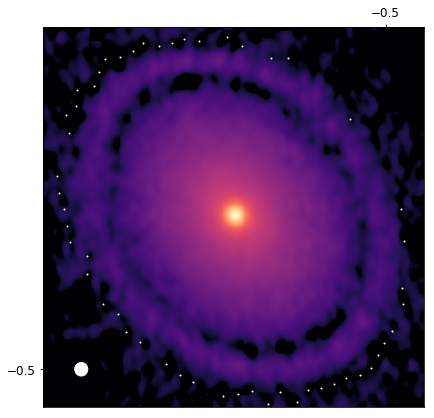

/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):


The MLE offsets are delta_x = 2.993e-03 arcsec, delta_y = -5.030e-03 arcsec
The MLE semi-major axis is r = 0.651 arcsec
The MLE inclination is i = 39.013 degrees
The MLE position angle is PA = 40.630 degrees
The MLE log-variance in the pixel offsets from the true ellipse is -8.817e+00


In [35]:
# Extract the ring that's at ~100 AU
xcoords3, ycoords3 = cont.extract_ring(95,105,tbins = -177.5+5*np.arange(72), extract_type = 'min')

cont.plot_extracted_ring(cont,xcoords3, ycoords3, 0.4, 1.25)

#get maximum likelihood estimates and check that ellipse parameters seem reasonable
mle_3 = ellipse_mle([disk["offsetx"],
                     disk["offsety"],
                     100/155.,
                     np.cos(disk["incl"]*np.pi/180.),
                     disk["PA"]*np.pi/180., 
                     np.log(.01**2)], 
                    xcoords3, ycoords3)

/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


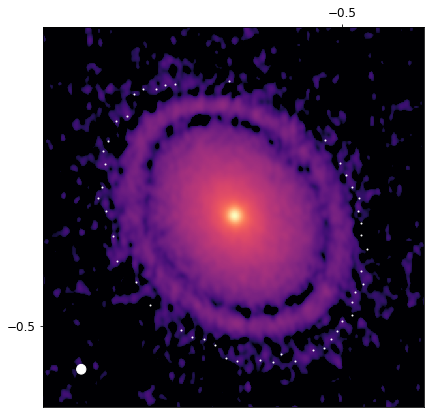

/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):


The MLE offsets are delta_x = 3.859e-03 arcsec, delta_y = -8.222e-03 arcsec
The MLE semi-major axis is r = 0.706 arcsec
The MLE inclination is i = 39.694 degrees
The MLE position angle is PA = 36.580 degrees
The MLE log-variance in the pixel offsets from the true ellipse is -8.577e+00


In [42]:
# Extract the gap that's at ~110 AU
xcoords4, ycoords4 = cont.extract_ring(105,115,tbins = -177.5+5*np.arange(72), extract_type = 'max')

cont.plot_extracted_ring(cont,xcoords4, ycoords4, 0.3, 1.75)

#get maximum likelihood estimates and check that ellipse parameters seem reasonable
mle_4 = ellipse_mle([disk["offsetx"],
                     disk["offsety"],
                     105/155.,
                     np.cos(disk["incl"]*np.pi/180.),
                     disk["PA"]*np.pi/180., 
                     np.log(.01**2)], 
                    xcoords4, ycoords4)

In [32]:
radialbins = 0.5+np.arange(0, 130)
#make some preliminary plots
newcont = Continuum(disk['filename'], -.002,0.001, 40, 39, disk['distance'])
    
newsurfbrightness, newSB_scatter, newrtmap = newcont.azunwrap(radialbins, tbins = -175 + 10.*np.arange(36))

/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)


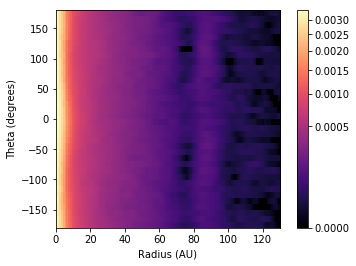

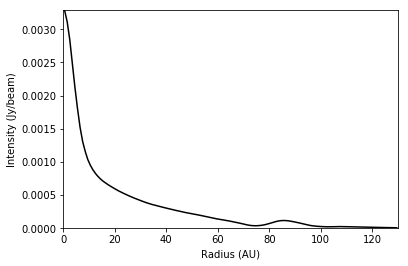

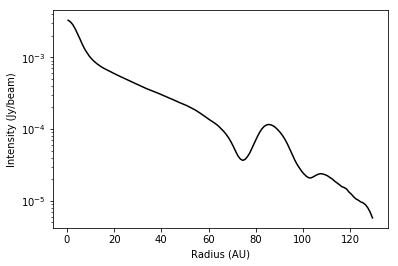

(0, 130)

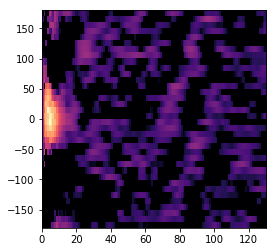

In [33]:
plt.imshow(newrtmap,extent =[0, np.max(radialbins)+1, -180,180], 
           aspect = 0.35, origin = 'lower', cmap = 'magma', vmin = 0, norm = col.PowerNorm(gamma = 0.4))
plt.ylim(ymin = -180, ymax = 180)
plt.xlim(xmin=0, xmax=130)
plt.xlim(xmin=0, xmax=130)
plt.colorbar()
plt.xlabel('Radius (AU)')
plt.ylabel('Theta (degrees)')
plt.show()


plt.plot(radialbins, newsurfbrightness, color = 'black')
plt.xlabel("Radius (AU)")
plt.ylabel("Intensity (Jy/beam)")
plt.xlim(xmin = 0, xmax = 130)
plt.ylim(ymin = np.min(newsurfbrightness), ymax = np.max(newsurfbrightness))
plt.show()

plt.semilogy(radialbins, newsurfbrightness, color = 'black')
plt.xlabel("Radius (AU)")
plt.ylabel("Intensity (Jy/beam)")
plt.show()

plt.imshow(newrtmap-np.mean(newrtmap, axis =0),extent =[0, np.max(radialbins)+1, -180,180], 
           aspect = 0.35, origin = 'lower', cmap = 'magma', vmin = 0, norm = col.PowerNorm(gamma = 0.4))
plt.ylim(ymin = -180, ymax = 180)
plt.xlim(xmin=0, xmax=130)
plt.xlim(xmin=0, xmax=130)